In [41]:
from catboost import CatBoostRegressor
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


In [40]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [42]:

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target



In [43]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [44]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [45]:

model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=8, loss_function="RMSE", verbose=0)
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)


In [46]:

y_pred = model.predict(X_test)


In [47]:

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 0.2891029942525106
RMSE: 0.4406085534108121
R2 Score: 0.8518509102407268


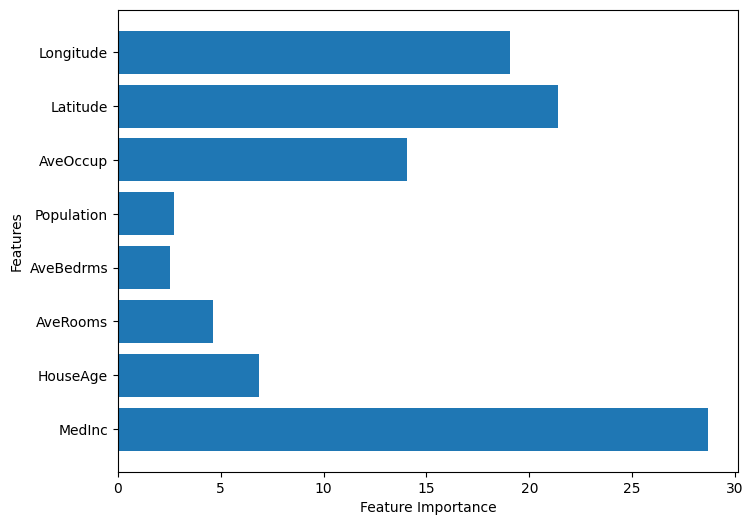

In [48]:

plt.figure(figsize=(8, 6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()